In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0-rc1


In [0]:
from keras.datasets import cifar10

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers

In [0]:
(x_train, y_train),(x_test,y_test)= cifar10.load_data()

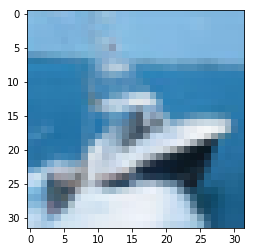

In [13]:
plt.imshow(x_train[8])

In [19]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

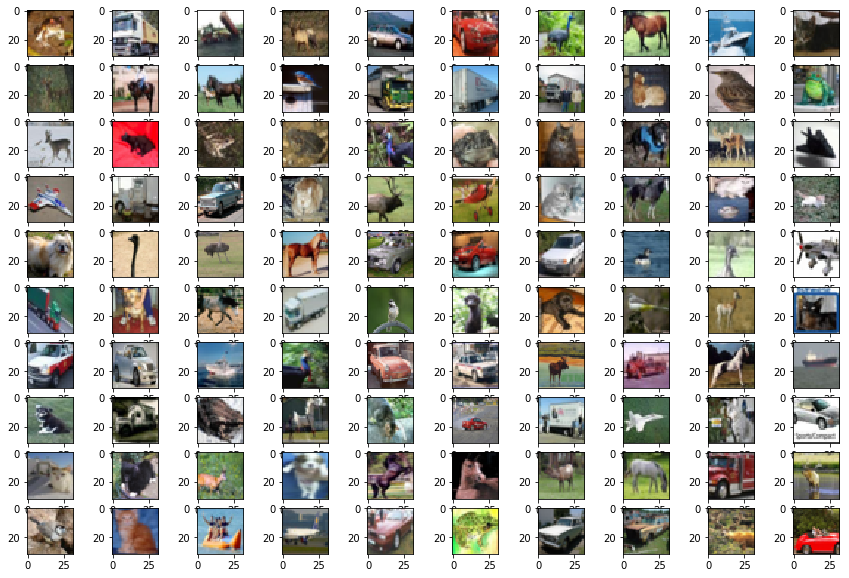

In [22]:
nrows=10
ncols=10
fig, subs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        iplt = subs[i, j]
        img_array = x_train[i*ncols + j]
        iplt.imshow(img_array)

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
from keras.utils import to_categorical
y_train=y_train.flatten()
y_train=to_categorical(y_train)

y_test=y_test.flatten()
y_test=to_categorical(y_test)

**Using VGG16 as Pretrained model with Imagenet Weights.**

In [46]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32,32, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


**Freezing the conv base layers**

In [47]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable=False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop= EarlyStopping(monitor='loss', mode='min', verbose=1)
model_check = ModelCheckpoint('my_best_model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)

In [58]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
vgg_model=model.fit(x_train, y_train, batch_size=100, epochs=10,callbacks=[early_stop,model_check]) 

Epoch 1/10
50000/50000 [==============================] - 519s 10ms/step - loss: 0.2422 - acc: 0.9064

Epoch 00001: acc improved from -inf to 0.90641, saving model to my_best_model.h5
Epoch 2/10
50000/50000 [==============================] - 520s 10ms/step - loss: 0.2321 - acc: 0.9102

Epoch 00002: acc improved from 0.90641 to 0.91017, saving model to my_best_model.h5
Epoch 3/10
50000/50000 [==============================] - 521s 10ms/step - loss: 0.2253 - acc: 0.9128

Epoch 00003: acc improved from 0.91017 to 0.91279, saving model to my_best_model.h5
Epoch 4/10
50000/50000 [==============================] - 521s 10ms/step - loss: 0.2202 - acc: 0.9149

Epoch 00004: acc improved from 0.91279 to 0.91487, saving model to my_best_model.h5
Epoch 5/10
50000/50000 [==============================] - 520s 10ms/step - loss: 0.2162 - acc: 0.9164

Epoch 00005: acc improved from 0.91487 to 0.91640, saving model to my_best_model.h5
Epoch 6/10
50000/50000 [==============================] - 521s 10ms/

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 111s 11ms/step


**Test Accuracy**

In [61]:
print(test_acc*100)

92.01499851226806
